In [133]:
import numpy as np 
import matplotlib.pyplot as plt
import lin_Fit as lf
import pandas as pd
from lib5 import quad, getV

# Estrarre $a_i$

*chi2 incertezza a priori	1.03	33.0
-chi2 incertezza a poster	30.99	33.0
*chi2 incertezza a priori	3.58	34.0
-chi2 incertezza a poster	31.72	34.0
*chi2 incertezza a priori	30.18	30.0
-chi2 incertezza a poster	29.37	30.0
*chi2 incertezza a priori	7.91	34.0
-chi2 incertezza a poster	23.58	34.0
*chi2 incertezza a priori	2.18	34.0
-chi2 incertezza a poster	33.8	34.0
*chi2 incertezza a priori	11.13	34.0
-chi2 incertezza a poster	22.58	34.0
Array di a: [0.04027 0.03364 0.02701 0.02303 0.02082 0.01845] [m/s^2]
Array di incertezze di a: [0.00038 0.00051 0.00044 0.00038 0.00028 0.00046] [m/s^2]


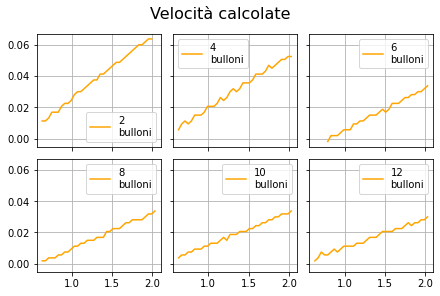

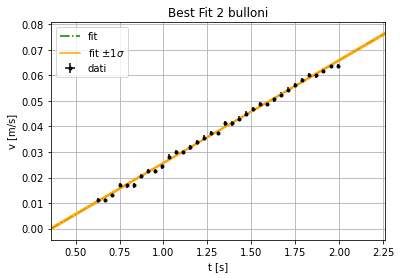

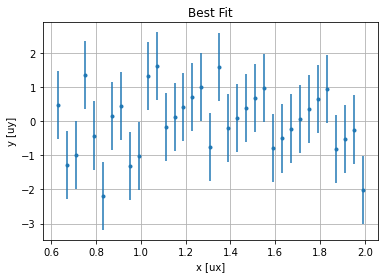

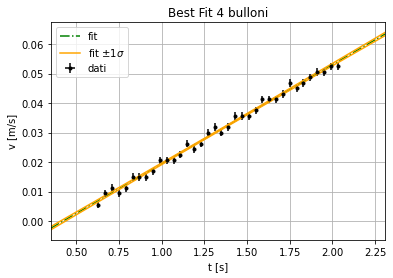

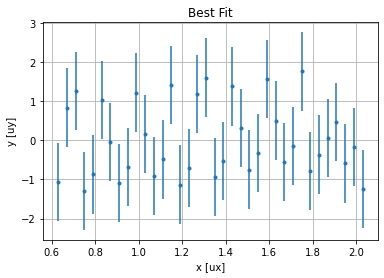

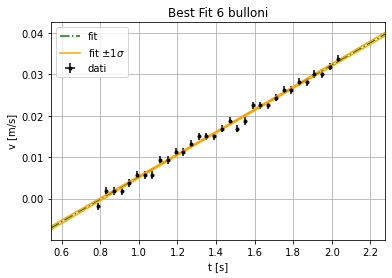

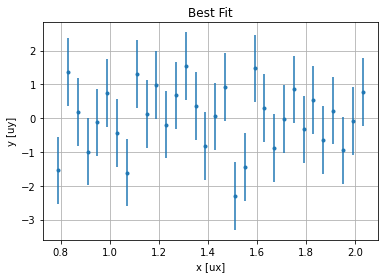

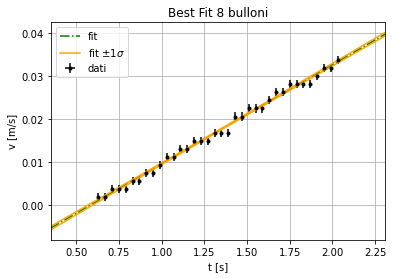

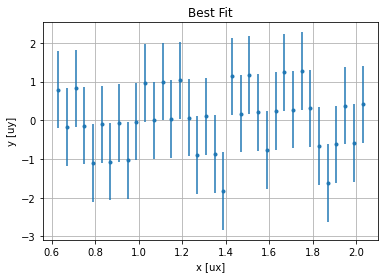

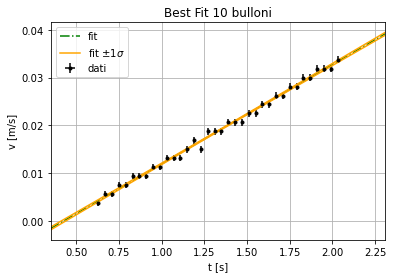

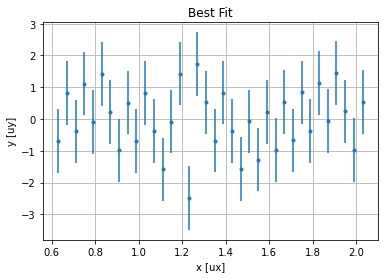

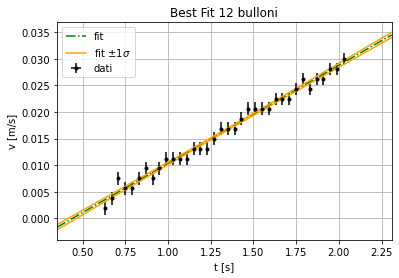

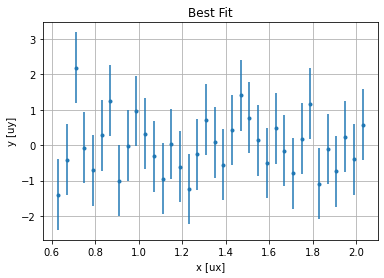

In [141]:
#setup grafici
#fig1,ax1 = plt.subplots(2,3,constrained_layout=True,sharex=True, sharey=True)
fig1 = plt.figure(1)
fig2,ax2 = plt.subplots(2,3,constrained_layout=True,sharex=True, sharey=True)
line = 0

#setup analisi
limits = np.array([[30,30,38,30,30,30], #minimi
                   [100,102,102,102,102,102]]) #massimi
a = np.arange(6.0)
sigma_a = np.arange(6.0)
sigma_x = 0.3*(10**-7)
sigma_t = 0.3*(10**-2)

#ciclo for
for i in range(6):
    name = 'data/completa'+str(i)+'.txt'
    df = pd.read_csv(name, sep = '\t', skiprows=1)
    t = df['Time (s)'].to_numpy()
    x = df['Position (m)'].to_numpy()
    x = x[limits[0][i]:limits[1][i]]
    t = t[limits[0][i]:limits[1][i]]
    
    n = x.size/2 # numero di punti sperimentali per il fit, n è float
    v = np.arange(n)
    sigma_v = np.arange(n)
    tau = np.arange(n)
    sigma_tau = np.arange(n)
    
    for j in range(int(n)):
        v[j], sigma_v[j] = getV(x[2*j+1],x[2*j],t[2*j+1],t[2*j], sigma_x, sigma_x, sigma_t, sigma_t) 
        tau[j] = (t[2*j+1]+t[2*j])/2
        sigma_tau[j] = quad(sigma_t, sigma_t)*0.5
        
    m0 = (v[int(n-1)]-v[0])/(tau[int(n-1)]-tau[0])
    
   
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v, sigma_tau, m0, plot=False, verbose=False, title='Fit '+str((i+1)*2)+' bulloni', xlabel='t [s]', ylabel='v [m/s]')
    
    chi2=0
    chi2 = np.sum(((v-(a[i]*tau+c))/sigma_v)**2)
    print('*chi2 incertezza a priori', chi2.round(2),n-2, sep = '\t')
    
    #plt.figure()
    #lf.residui(tau,v,a[i],c, sigma_v, normalize=True)
    
    sigma_v_new_scalar = np.sqrt(np.sum((v-(a[i]*tau+c))**2)/(n-2))
    sigma_v_new = np.full(int(n), sigma_v_new_scalar)
    
    plt.figure()
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v_new, plot=True, verbose = False, title='Best Fit '+str((i+1)*2)+' bulloni', xlabel = 't [s]', ylabel='v [m/s]')
    
    plt.figure()
    lf.residui(tau,v,a[i],c, sigma_v_new, normalize=True, title = 'Best Fit')
    
    chi2=0
    chi2 = np.sum(((v-(a[i]*tau+c))/sigma_v_new)**2)
    print('-chi2 incertezza a poster',chi2.round(2),n-2,sep='\t')
    
    #plotting
    if (i == 3): line = 1
    plt.figure(1)
    plt.plot(t,x, label = str((i+1)*2)+' bulloni')
    plt.legend()
    plt.grid()
    plt.close(1)
    
    ax2[line][i%3].plot(tau,v, label = str((i+1)*2)+'\nbulloni', color='orange')
    ax2[line][i%3].legend()
    ax2[line][i%3].grid()
    

fig1.suptitle('Posizioni misurate', fontsize = 16)
fig2.suptitle('Velocità calcolate', fontsize = 16)
fig1.savefig('fig5b/posizioni.pdf')
fig2.savefig('fig5b/velocità.pdf')
print("Array di a:",a.round(5),'[m/s^2]')
print("Array di incertezze di a:",sigma_a.round(5),'[m/s^2]')

Text(0.5, 0.98, 'Risultati del fit')

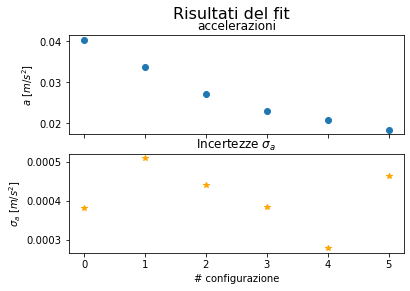

In [135]:
fig3, ax3 = plt.subplots(2, sharex = True)
ax3[0].plot(a, 'o')
ax3[0].set_title('accelerazioni')
ax3[0].set_ylabel('$a~[m/s^2]$')
ax3[1].plot(sigma_a, '*', color = 'orange')
ax3[1].set_title('Incertezze $\sigma_a$',)
ax3[1].set_ylabel('$\sigma_a~[m/s^2]$')
plt.xlabel('# configurazione')

fig3.suptitle('Risultati del fit', fontsize=16)

# Propagazione delle incertezze

In [136]:
import sympy as sp
v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2 = sp.symbols('v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2')
v = (x2-x1)/(t2-t1)
sigma_v = quad(sp.diff(v,x2)*sigma_x2,
               sp.diff(v,x1)*sigma_x1,
               sp.diff(v,t2)*sigma_t2,
               sp.diff(v,t1)*sigma_t1)
sigma_v

(sigma_t1**2*(-x1 + x2)**2/(-t1 + t2)**4 + sigma_t2**2*(-x1 + x2)**2/(-t1 + t2)**4 + sigma_x1**2/(-t1 + t2)**2 + sigma_x2**2/(-t1 + t2)**2)**0.5

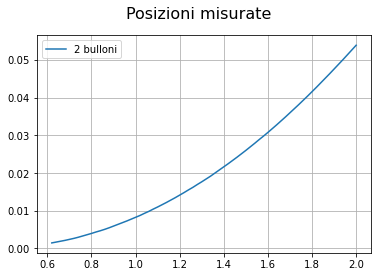

In [137]:
fig1

In [138]:

fig,ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace = 0.1)
ax[0].errorbar(0,0)
ax[.grid()

SyntaxError: invalid syntax (<ipython-input-138-2cc42fa648bf>, line 4)